In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv("Food_Delivery_Times.csv")

df.head()


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [3]:
df_clean = df.copy()


In [4]:
categorical_cols = ['Weather', 'Traffic_Level', 'Time_of_Day']

for col in categorical_cols:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)


C:\Users\dell\AppData\Local\Temp\ipykernel_17592\3028883129.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)


In [5]:
df_clean['Courier_Experience_yrs'].fillna(
    df_clean['Courier_Experience_yrs'].median(),
    inplace=True
)


C:\Users\dell\AppData\Local\Temp\ipykernel_17592\204876923.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Courier_Experience_yrs'].fillna(


In [6]:
df_clean.isnull().sum()


Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

In [7]:
df_clean.head()


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


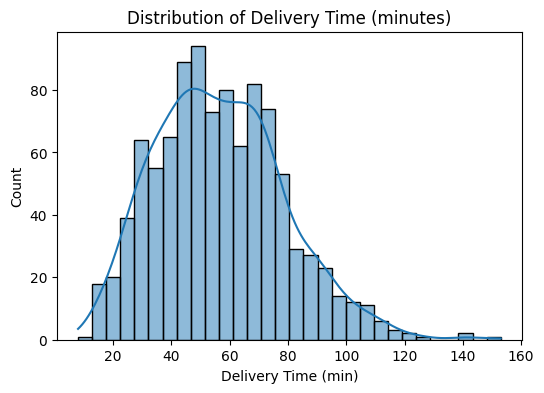

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(df_clean['Delivery_Time_min'], bins=30, kde=True)
plt.title("Distribution of Delivery Time (minutes)")
plt.xlabel("Delivery Time (min)")
plt.ylabel("Count")
plt.show()


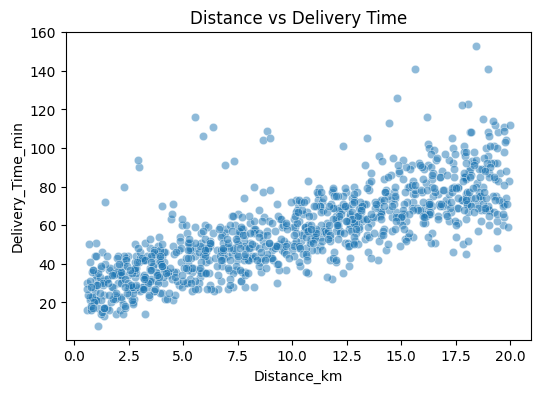

In [9]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Distance_km',
    y='Delivery_Time_min',
    data=df_clean,
    alpha=0.5
)
plt.title("Distance vs Delivery Time")
plt.show()


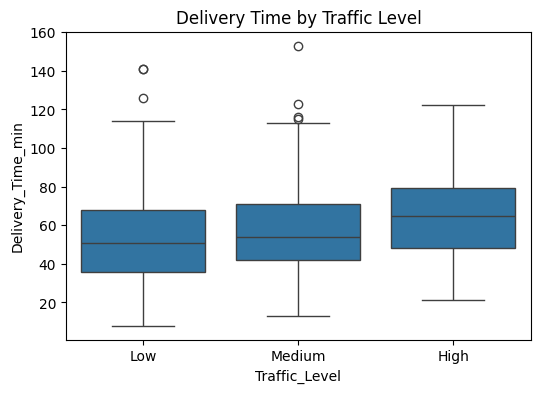

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x='Traffic_Level',
    y='Delivery_Time_min',
    data=df_clean
)
plt.title("Delivery Time by Traffic Level")
plt.show()


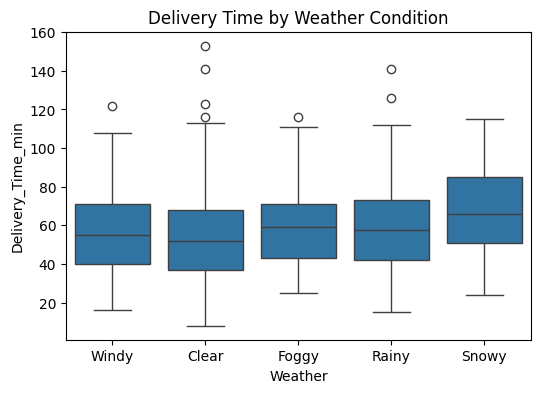

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x='Weather',
    y='Delivery_Time_min',
    data=df_clean
)
plt.title("Delivery Time by Weather Condition")
plt.show()


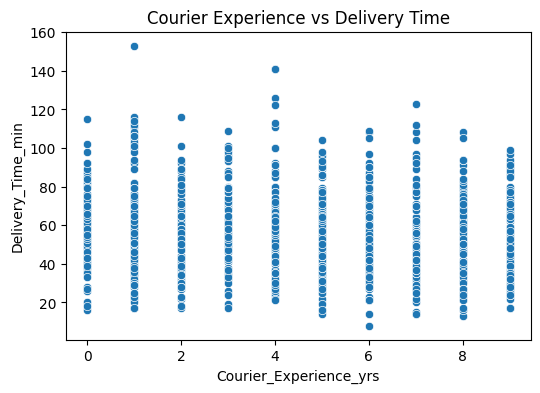

In [12]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Courier_Experience_yrs',
    y='Delivery_Time_min',
    data=df_clean
)
plt.title("Courier Experience vs Delivery Time")
plt.show()


In [13]:
df_clean.groupby('Time_of_Day')['Delivery_Time_min'].mean().sort_values()


Time_of_Day
Night        55.211765
Afternoon    56.080986
Morning      57.011834
Evening      57.481229
Name: Delivery_Time_min, dtype: float64

In [14]:
X = df_clean.drop(['Delivery_Time_min', 'Order_ID'], axis=1)
y = df_clean['Delivery_Time_min']


In [15]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

categorical_cols, numerical_cols


(Index(['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'], dtype='object'),
 Index(['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs'], dtype='object'))

In [16]:
X_encoded = pd.get_dummies(
    X,
    columns=categorical_cols,
    drop_first=True
)


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(
    X_encoded[numerical_cols]
)


In [18]:
X_encoded.shape, y.shape


((1000, 14), (1000,))

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape


((800, 14), (200, 14))

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

mae_lr, rmse_lr, r2_lr


(5.8991686983534874, np.float64(8.82647014987338), 0.8261894538886112)

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


In [23]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, rmse_rf, r2_rf


(7.079249999999999, np.float64(10.27400294432506), 0.7645051672760212)

In [24]:
model_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [mae_lr, mae_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'R2 Score': [r2_lr, r2_rf]
})

model_results


,Model,MAE,RMSE,R2 Score
0,Linear Regression,5.899169,8.826470,0.826189
1,Random Forest,7.079250,10.274003,0.764505


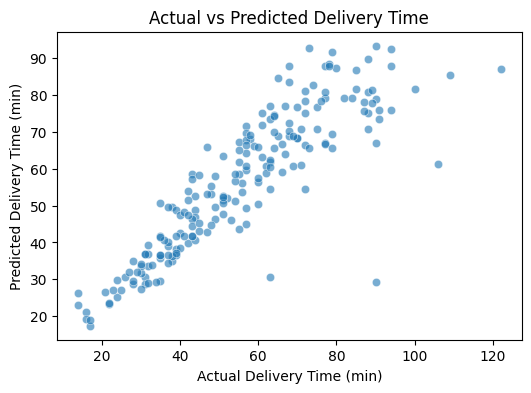

In [25]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.xlabel("Actual Delivery Time (min)")
plt.ylabel("Predicted Delivery Time (min)")
plt.title("Actual vs Predicted Delivery Time")
plt.show()


In [26]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X_encoded.columns
).sort_values(ascending=False)

feature_importance.head(10)


Distance_km               0.698920
Preparation_Time_min      0.158465
Courier_Experience_yrs    0.043391
Traffic_Level_Low         0.019128
Time_of_Day_Evening       0.011834
Weather_Snowy             0.011235
Weather_Rainy             0.010454
Vehicle_Type_Car          0.008866
Weather_Foggy             0.008690
Vehicle_Type_Scooter      0.008036
dtype: float64

In [27]:
df_clean['Predicted_Delivery_Time_min'] = rf.predict(X_encoded)


In [28]:
df_clean['Prediction_Error_min'] = (
    df_clean['Delivery_Time_min'] - df_clean['Predicted_Delivery_Time_min']
)


In [29]:
df_clean.head()


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Predicted_Delivery_Time_min,Prediction_Error_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43,42.26,0.74
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84,82.20,1.80
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59,60.82,-1.82
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37,36.37,0.63
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68,73.18,-5.18


In [30]:
df_clean.to_csv("delivery_time_powerbi.csv", index=False)
